# **Prediction Machine Learning For Stroke Disease**

### **Stroke Prediction uses ensemble learning, namely a stacking classifier with the provision of combining 4 algorithms :**

1. Decision Tree, 
2. KNN (K-Nearest Neighbors), 
3. SVM (Support Vector Machine), 
4. logistic regression. 

### **This project aims to determine the predictive parameters of several risks that exist in stroke**

# **Install Modul For Preparation Step**

In [1]:
!pip install scikit-learn
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 23.6 MB/s eta 0:00:00


# **Import Library**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Importing necessary libraries for visualization
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# **Data Preparation**

In [3]:
# Import Dataset from my github repository and for data .csv is form kaggle 
url = 'https://raw.githubusercontent.com/Mocher29/PredictionML-For-StrokeDisease/main/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(url, encoding="UTF-8")

In [4]:
# Analyze dataset
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
# Preview of Dataset
data.head

<bound method NDFrame.head of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban   

# **Preprocessing Data**

In [6]:
# retrieval of some data that will be displayed
data.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4370,31708,Female,13.0,0,0,No,children,Urban,84.03,25.3,Unknown,0
2079,55522,Female,4.0,0,0,No,children,Rural,206.25,17.0,Unknown,0
2270,62951,Female,32.0,0,0,Yes,Private,Rural,61.83,31.3,never smoked,0
2881,38354,Female,62.0,0,0,Yes,Self-employed,Urban,91.82,19.6,Unknown,0
4557,724,Male,17.0,0,0,No,Private,Rural,81.77,44.7,never smoked,0
4721,15282,Female,77.0,0,0,Yes,Private,Rural,90.96,31.5,formerly smoked,0
4671,15387,Male,19.0,0,0,No,Private,Rural,79.60,36.7,Unknown,0
1576,21720,Female,77.0,0,0,Yes,Private,Rural,93.48,25.2,formerly smoked,0
1215,61983,Female,41.0,0,0,Yes,Private,Urban,133.76,43.4,smokes,0
3072,10826,Female,39.0,0,0,Yes,Self-employed,Urban,82.85,22.9,smokes,0


In [7]:
# intended to explain the types of data types that exist in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# The Pandas method is used to produce descriptive statistics about the numerical features in the dataset
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## **Cleaning Data**

In [9]:
# To delete the ID column
data.drop(['id'],axis=1,inplace = True)

In [10]:
# To delete columns that have duplicate data in them
data.drop_duplicates(inplace=True)

In [11]:
# Preview of Dataset after cleaning data
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Handling Missing Data**

In [12]:
# Check the data in the column whether there are blanks or not
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
# Perform median imputation for the 'bmi' column
bmi_median = data['bmi'].median()
data['bmi'].fillna(bmi_median, inplace=True)

# Check if missing values have been filled
missing_values_after_imputation = data['bmi'].isnull().sum()

# Displays the median of bmi and checks for empty data
bmi_median, missing_values_after_imputation

(28.1, 0)

In [14]:
# Check again whether there is empty data or not
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## **Data Visualization**

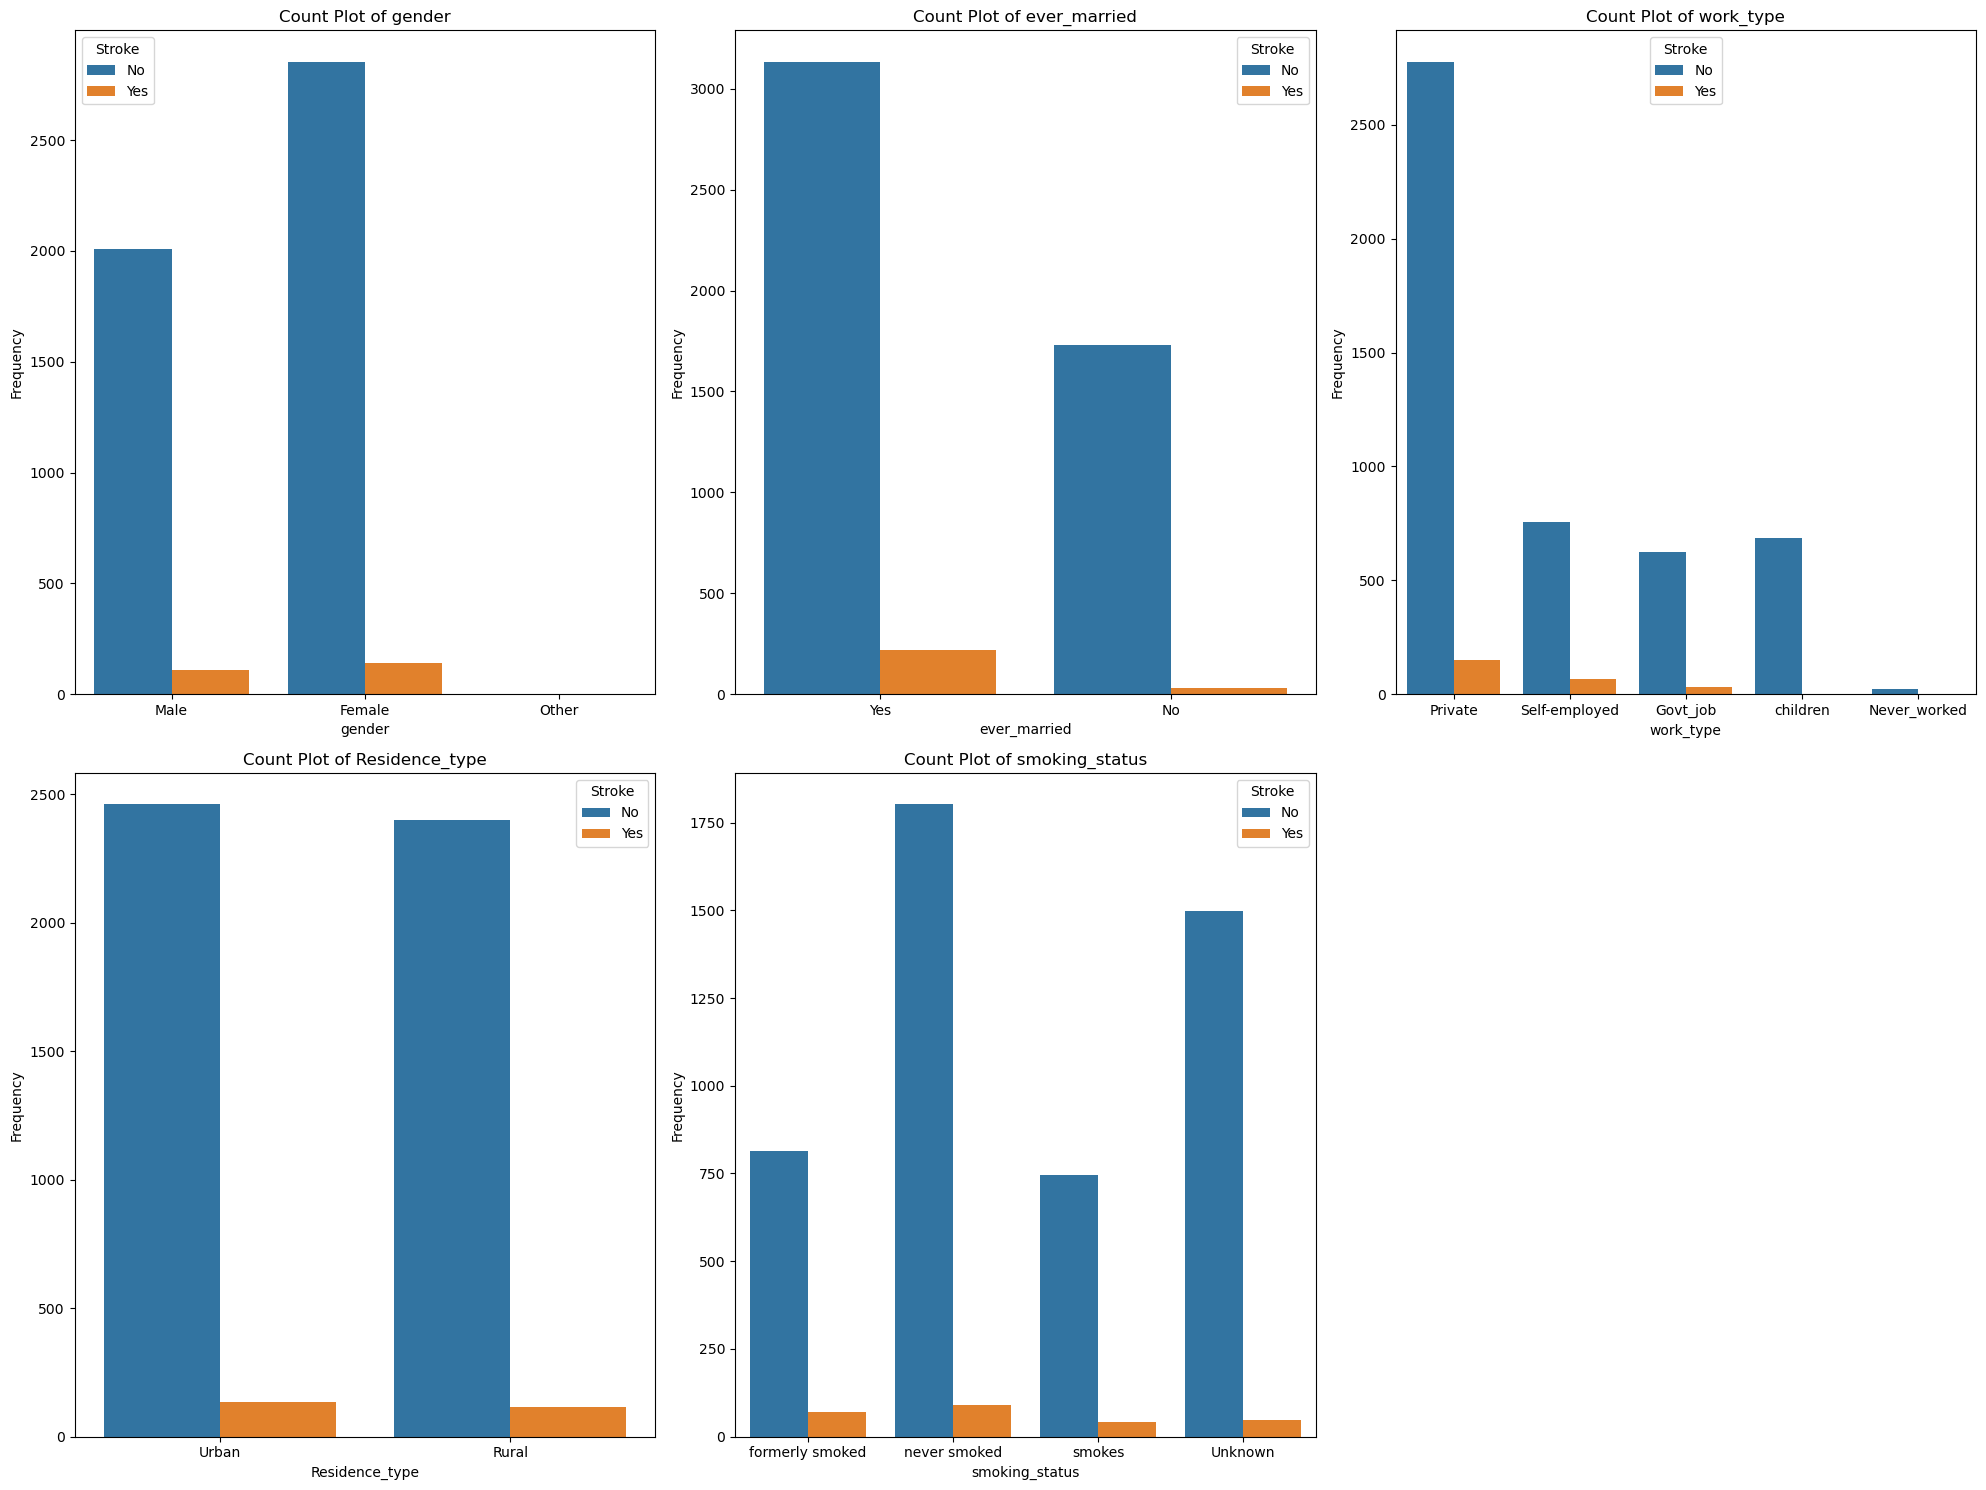

{'gender': Female    2994
 Male      2115
 Other        1
 Name: gender, dtype: int64,
 'ever_married': Yes    3353
 No     1757
 Name: ever_married, dtype: int64,
 'work_type': Private          2925
 Self-employed     819
 children          687
 Govt_job          657
 Never_worked       22
 Name: work_type, dtype: int64,
 'Residence_type': Urban    2596
 Rural    2514
 Name: Residence_type, dtype: int64,
 'smoking_status': never smoked       1892
 Unknown            1544
 formerly smoked     885
 smokes              789
 Name: smoking_status, dtype: int64}

In [15]:
# Create a list of categorical columns to visualize
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create subplots for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=col, hue='stroke')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Stroke', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

# Value counts for each categorical feature
value_counts = {col: data[col].value_counts() for col in categorical_cols}
value_counts

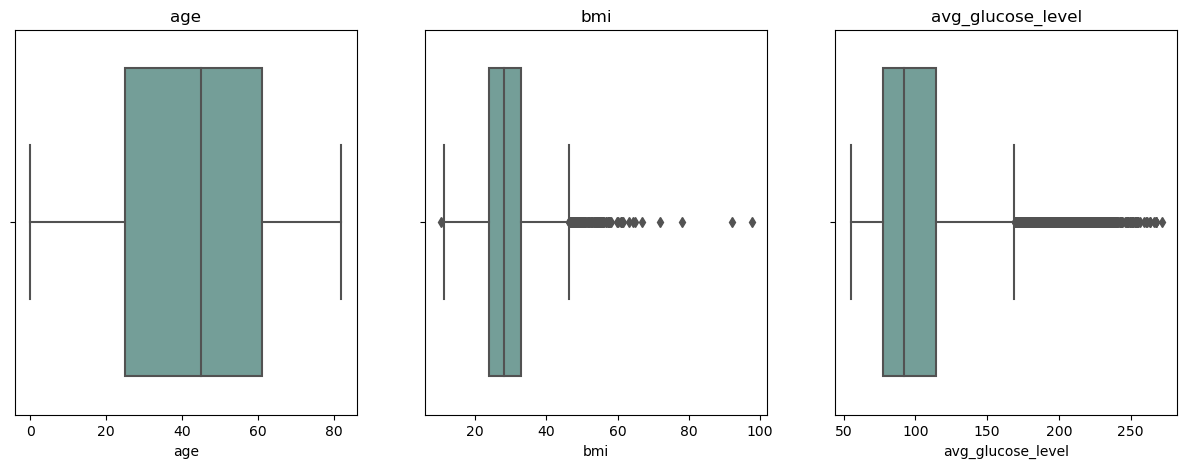

In [16]:
# Create a list of numerical columns to visualize
num_cols = ['age','bmi','avg_glucose_level']

# Initialize the figure
plt.figure(figsize=(15, 5))

# Create subplots for each numerical column
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=data[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [17]:
def detect_outliers(data,column):
    q1 = data[column].quantile(.25)
    q3= data[column].quantile(.75)
    IQR = q3-q1

    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)

    ls = data.index[(data[column] <lower_bound) | (data[column] > upper_bound)]

    return ls

In [18]:
index_list = []

for column in num_cols:
    index_list.extend(detect_outliers(data,column))

# remove duplicated indices in the index_list and sort it
index_list = sorted(set(index_list))

In [19]:
before_remove =data.shape

data =data.drop(index_list)
after_remove = data.shape

print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (5110, 11)
Shape of data after remove : (4391, 11)


In [20]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000,4391.000000
mean,40.896406,0.074243,0.039171,91.477067,27.786108,0.037577
std,22.544349,0.262195,0.194024,22.662442,6.559553,0.190192
min,0.080000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,23.000000,0.000000,0.000000,75.075000,23.200000,0.000000
50%,42.000000,0.000000,0.000000,88.040000,27.600000,0.000000
75%,58.000000,0.000000,0.000000,104.020000,31.900000,0.000000
max,82.000000,1.000000,1.000000,168.680000,46.200000,1.000000


In [21]:
# To find out data number of stroke(1) v. non-stroke(0) patients in the dataset
data["stroke"].value_counts()

0    4226
1     165
Name: stroke, dtype: int64

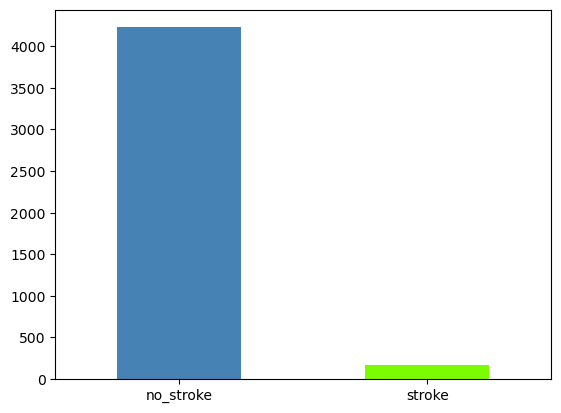

In [22]:
# Let's put this in a plot
st_plot = data["stroke"].value_counts().plot(kind="bar",color=["steelblue","lawngreen"], rot=0)
plt.xticks(ticks=[1,0], labels=["stroke", "no_stroke"]);

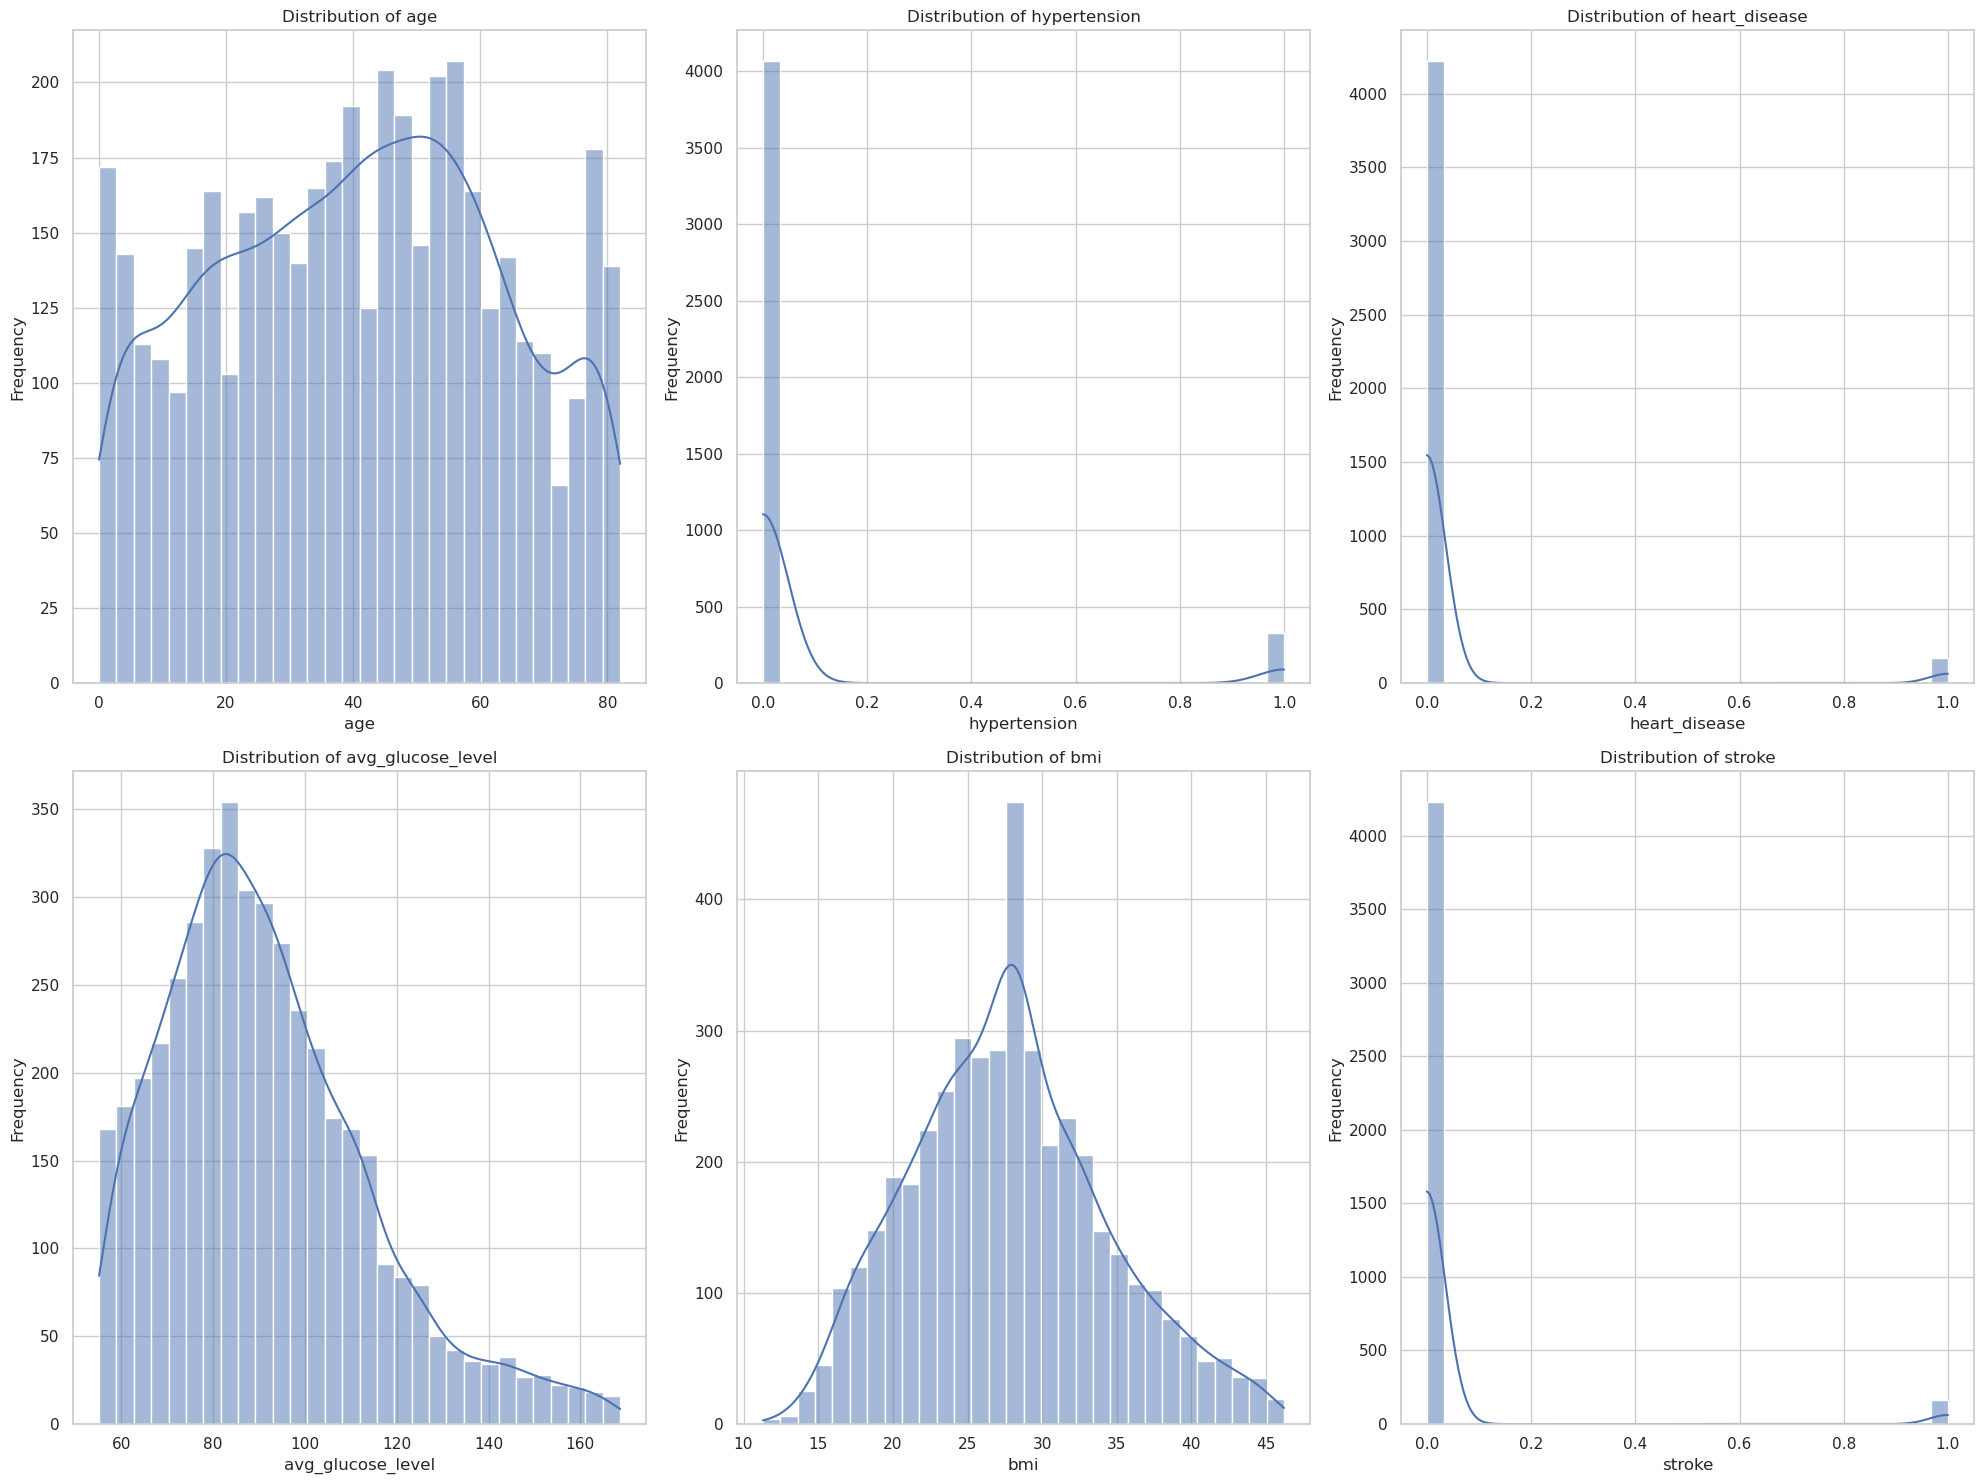

In [23]:
# Set style for seaborn
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create a list of numerical columns to visualize
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# Create subplots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

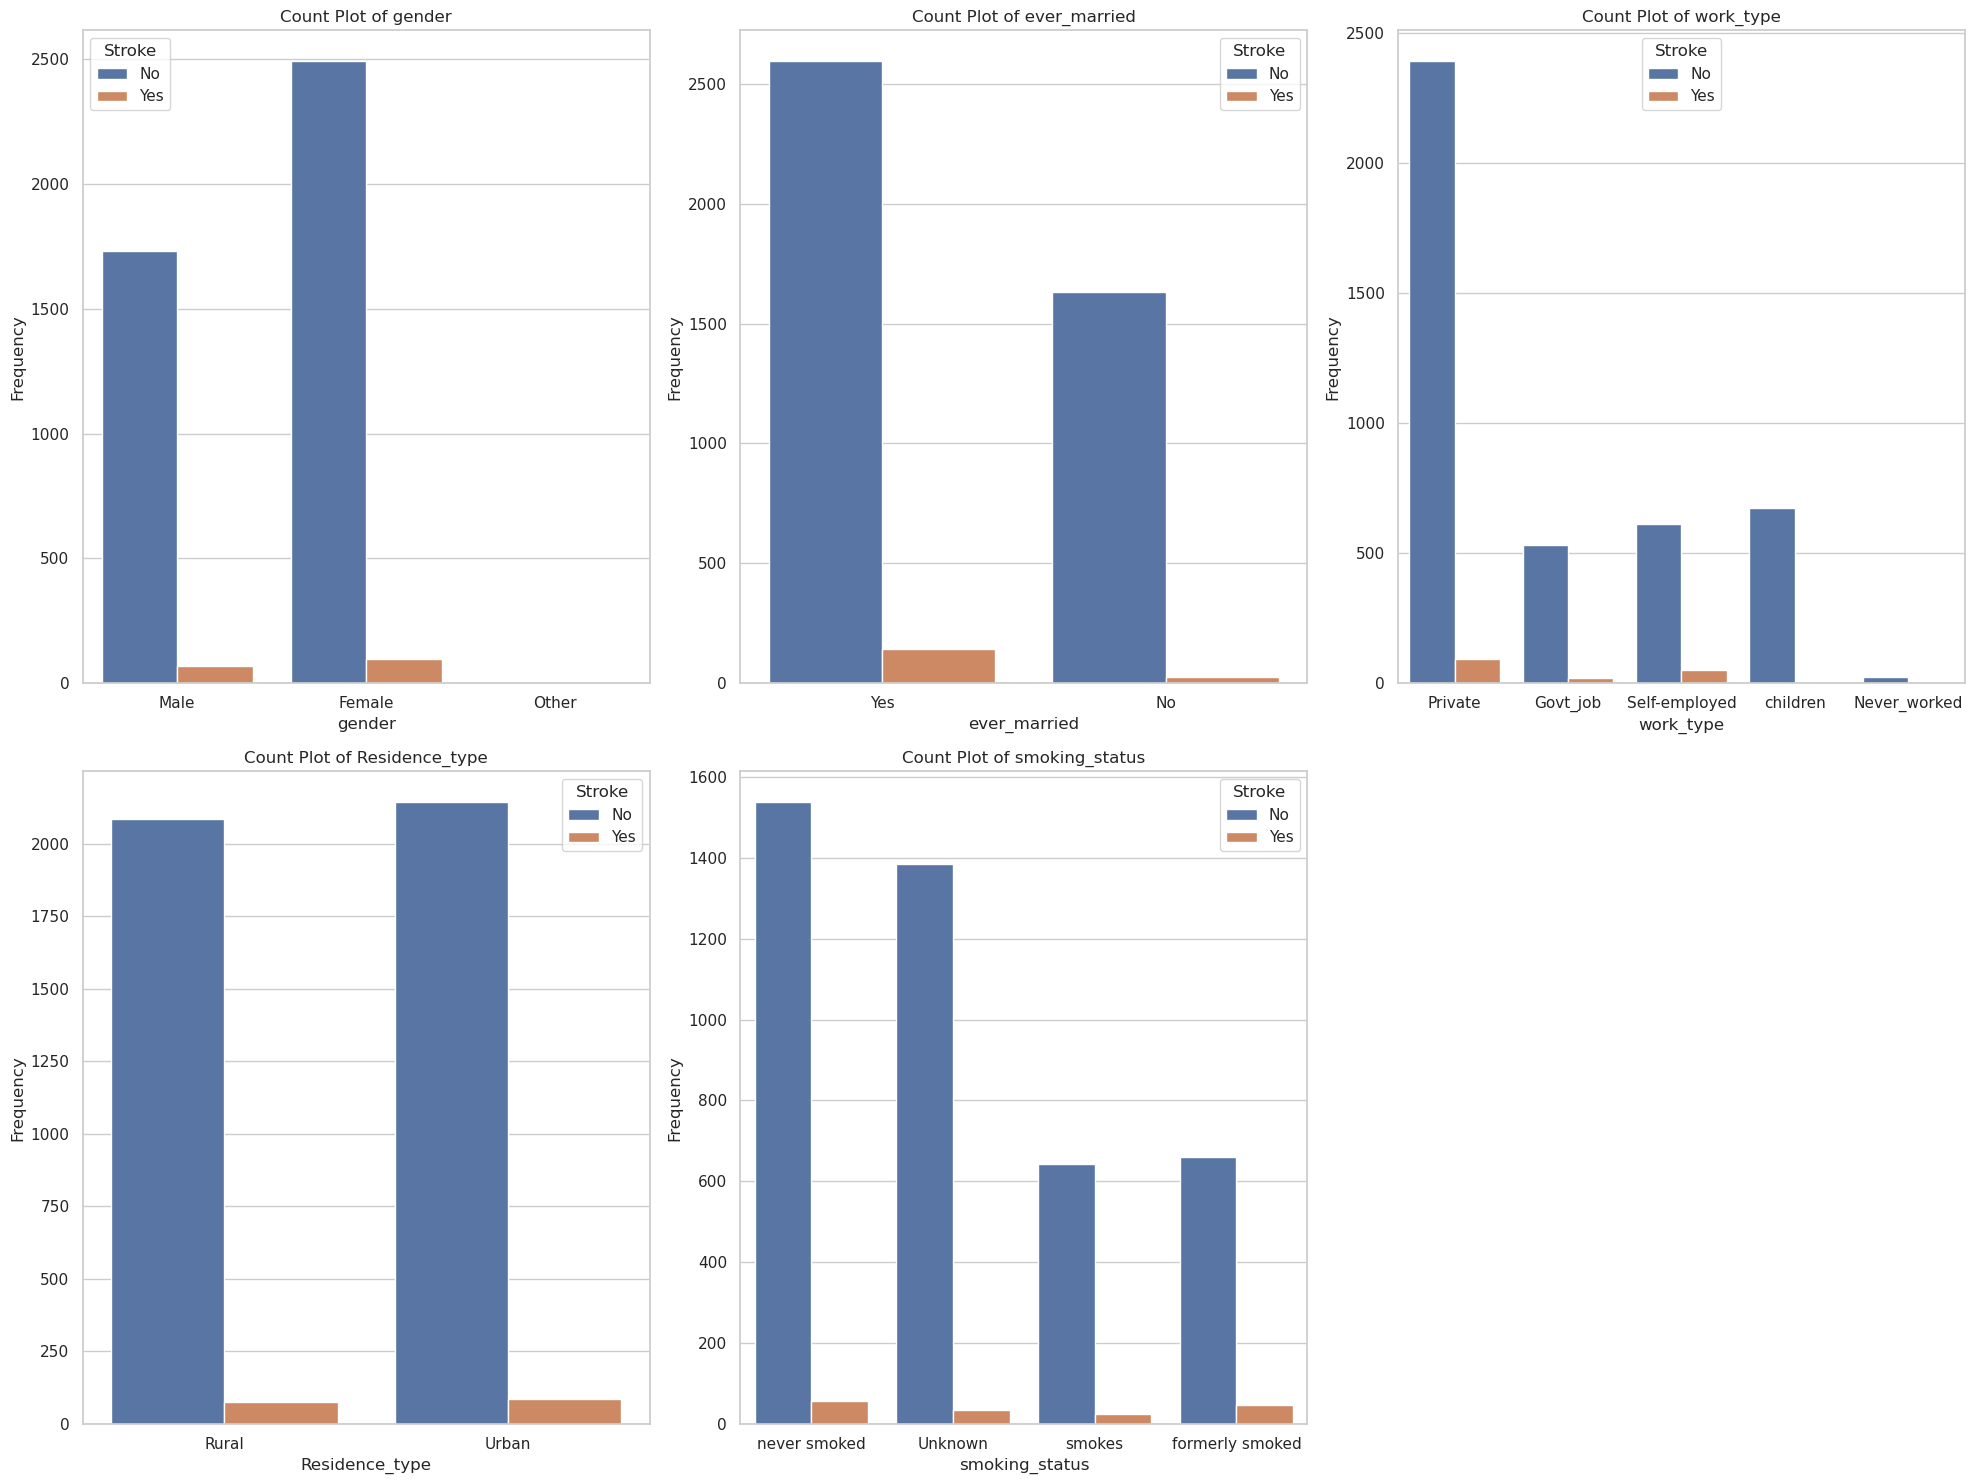

{'gender': Female    2590
 Male      1800
 Other        1
 Name: gender, dtype: int64,
 'ever_married': Yes    2735
 No     1656
 Name: ever_married, dtype: int64,
 'work_type': Private          2482
 children          674
 Self-employed     661
 Govt_job          552
 Never_worked       22
 Name: work_type, dtype: int64,
 'Residence_type': Urban    2230
 Rural    2161
 Name: Residence_type, dtype: int64,
 'smoking_status': never smoked       1595
 Unknown            1418
 formerly smoked     708
 smokes              670
 Name: smoking_status, dtype: int64}

In [24]:
# Create a list of categorical columns to visualize
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create subplots for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=col, hue='stroke')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Stroke', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

# Value counts for each categorical feature
value_counts = {col: data[col].value_counts() for col in categorical_cols}
value_counts

Categorical Features Overview


*   Gender: Majority are Female (2994), followed by Male (2115). There is one entry marked as 'Other'.
*   Ever Married: More people are marked as 'Yes' (3353) than 'No' (1757).
*   Work Type: Most people work in the Private sector (2925), followed by Self-employed (819), children (687), and Govt_job (657). A few have 'Never_worked' (22).
*   Residence Type: The dataset is almost evenly split between 'Urban' (2596) and 'Rural' (2514) residence types.
*   Smoking Status: The most frequent category is 'never smoked' (1892), followed by 'Unknown' (1544), 'formerly smoked' (885), and 'smokes' (789).

Observations from Count Plots:


*   For most categories, the ratio of people who had a stroke to those who did not is relatively consistent, with a few exceptions.
*   Among the 'work_type' categories, 'children' have a noticeably lower incidence of stroke, which is intuitive given that age is a significant risk factor for stroke.
*   The 'smoking_status' of 'formerly smoked' seems to have a relatively higher incidence of stroke compared to other smoking statuses.

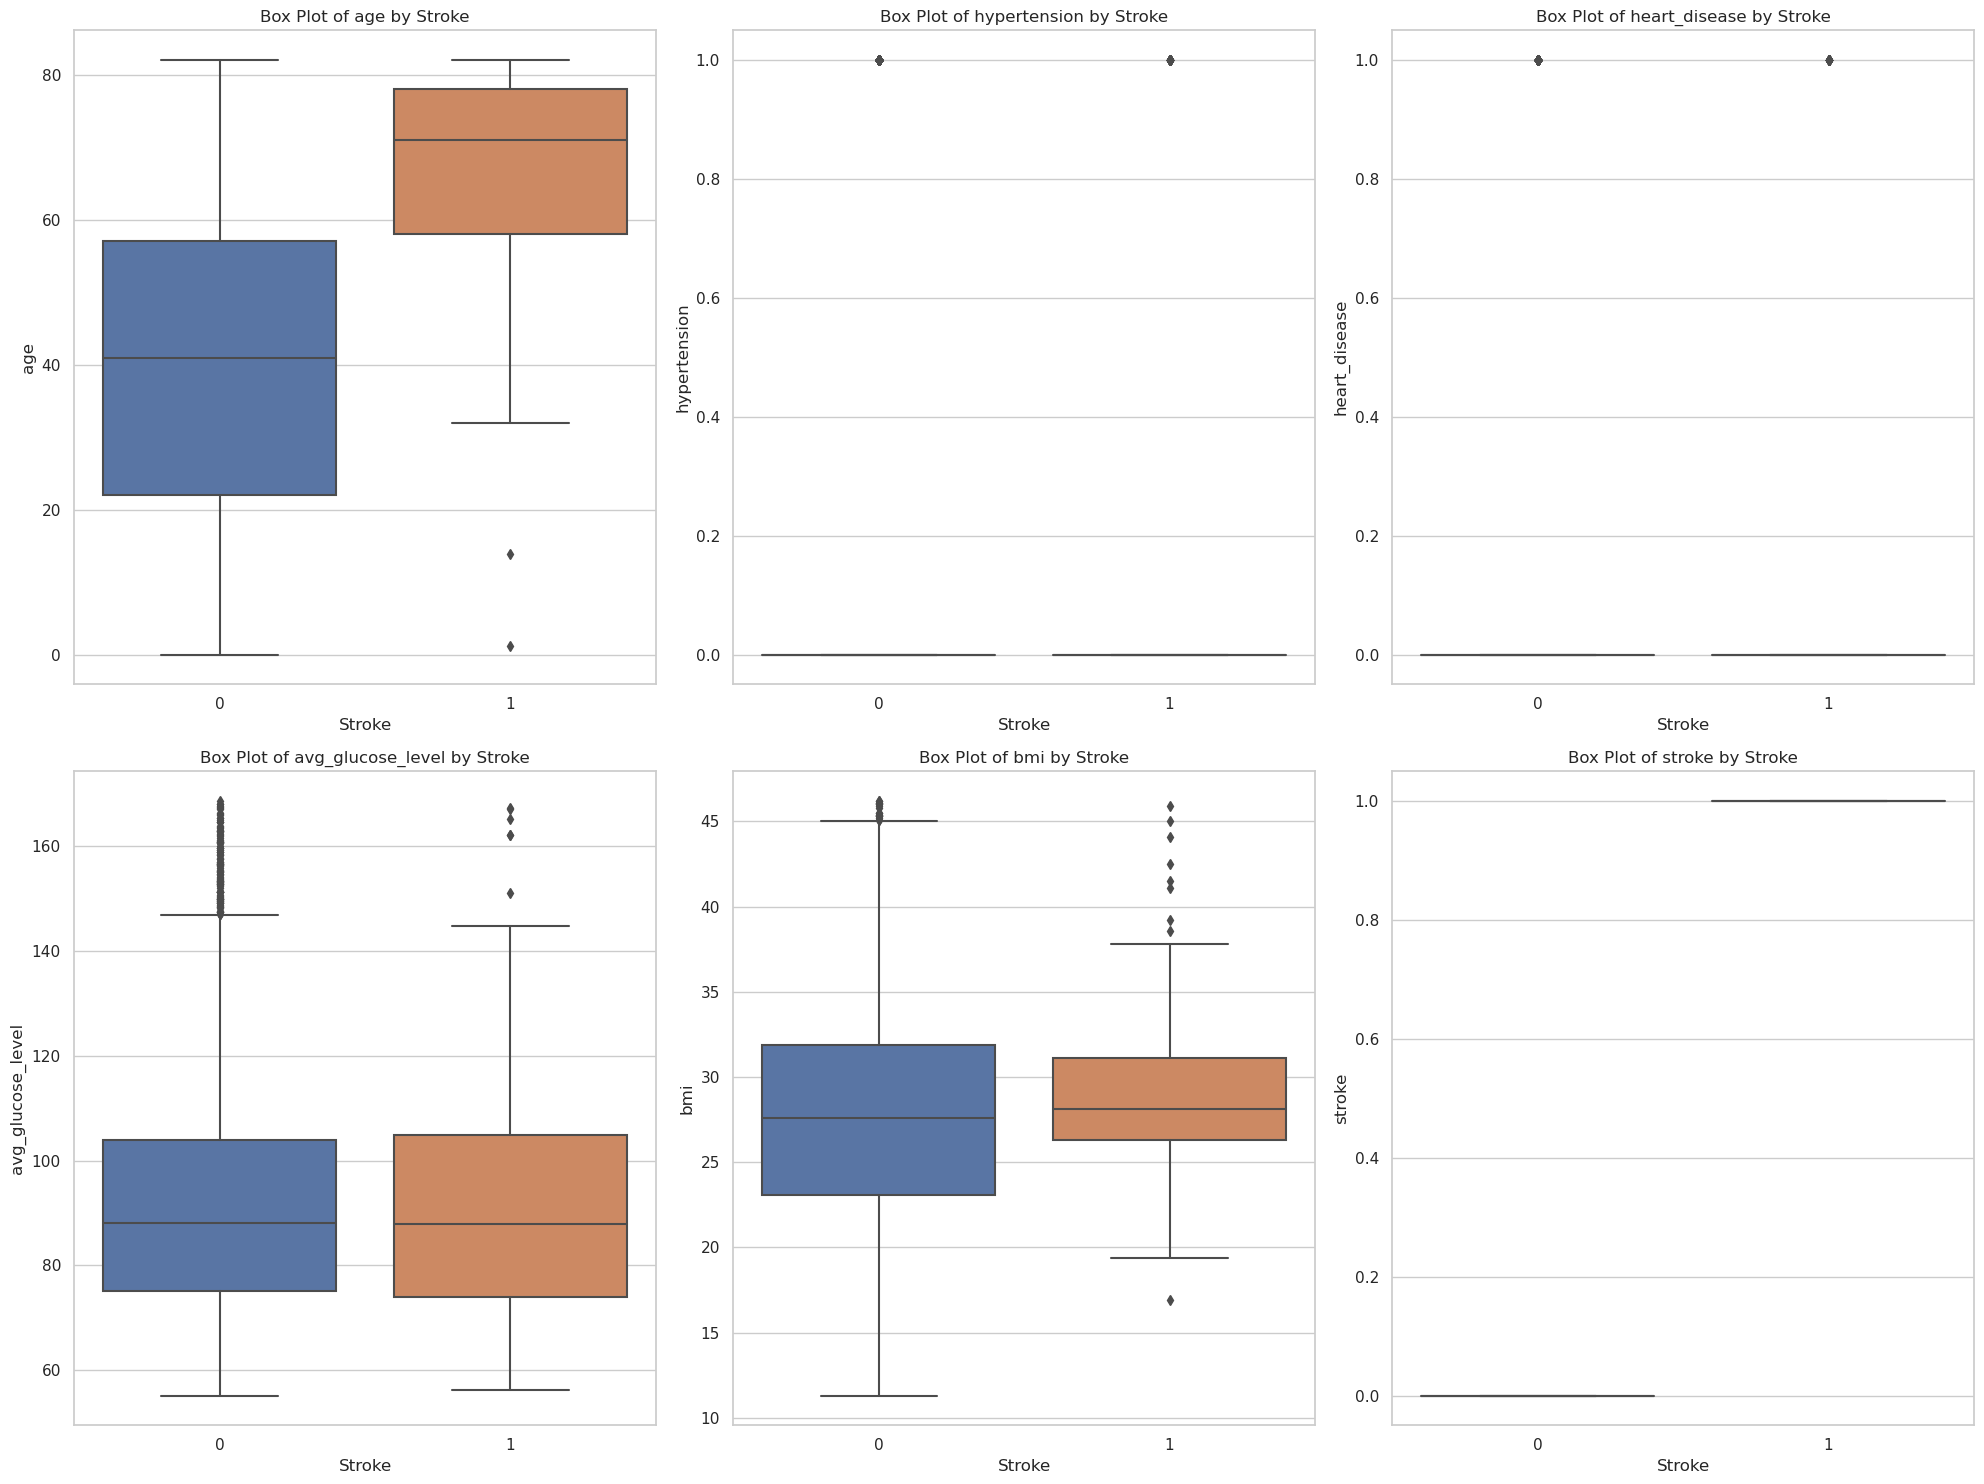

In [25]:
# Initialize the figure
plt.figure(figsize=(20, 15))

# Create box plots for numerical columns
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='stroke', y=col, data=data)
    plt.title(f'Box Plot of {col} by Stroke')
    plt.xlabel('Stroke')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Box Plot Analysis for Numerical Columns


*   Age: There's a noticeable difference in the age distribution between those who had a stroke and those who didn't. People who had a stroke tend to be older.
*   Hypertension and Heart Disease: These binary variables don't show much spread, but it appears that the median is higher for those with a stroke, indicating these conditions could be risk factors.
*   Average Glucose Level: There are many outliers in both categories, but people who had a stroke tend to have a higher average glucose level.
*   BMI: The spread is quite large for both categories, with several outliers. There's not a significant difference in the medians between the two groups.
*   Stroke: This is the target variable, and the box plot reaffirms the imbalance in the dataset.

## **Transformation Data**

In [26]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Select categorical columns to encode
categorical_cols_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply LabelEncoder on categorical columns
for col in categorical_cols_to_encode:
    data[col] = label_encoder.fit_transform(data[col])

# Display the first few rows of the dataframe to verify the encoding
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,0,59.0,0,0,1,2,0,76.15,28.1,0,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1


In [27]:
# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns to scale
numerical_cols_to_scale = ['age', 'avg_glucose_level', 'bmi']

# Apply scaling on numerical columns
data[numerical_cols_to_scale] = scaler.fit_transform(data[numerical_cols_to_scale])

# Display the first few rows of the dataframe to verify scaling
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,1.734716,0,1,1,2,0,0.637380,0.718712,2,1
6,1,1.468544,1,1,1,2,0,-0.943830,-0.058869,2,1
7,0,1.246733,0,0,0,2,1,0.128550,-0.760216,2,1
8,0,0.803113,0,0,1,2,0,-0.676397,0.047858,0,1
9,0,1.645992,0,0,1,2,1,-1.452218,-0.546762,0,1


The numerical `columns—age`, ` avg_glucose_level` , and `bmi`—have been successfully scaled using standard scaling. The values in these columns now have a mean of 0 and a standard deviation of 1, making them suitable for machine learning algorithms sensitive to feature scales

<AxesSubplot:>

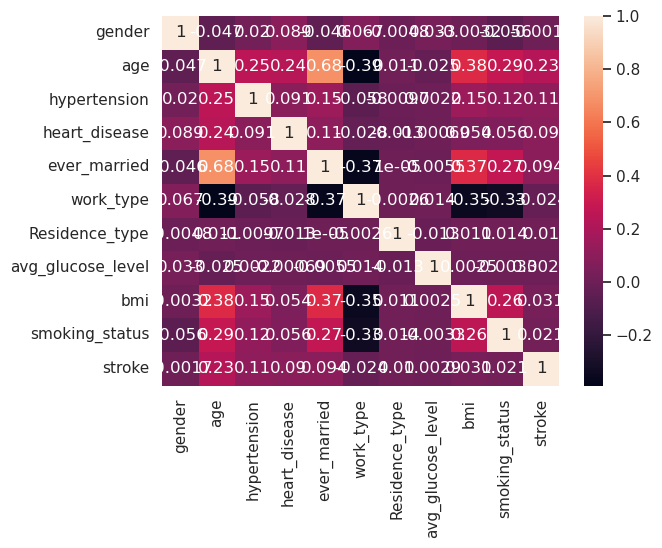

In [28]:
corr=data.corr()
sns.heatmap(corr, annot=True)

The only correlation I can really see here is with age and likelihood of having a stroke. While it's not a very strong correlation, age does seem to be a better indicator of having a stroke than any of the other variables.

I think this is a good place to end our EDA for this notebook.

<AxesSubplot:title={'center':'Count stroke status'}>

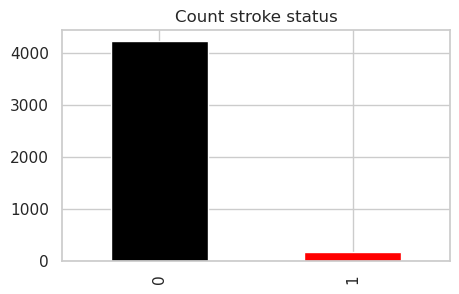

In [29]:
plt.figure(figsize=(5, 3))
data['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['black', 'red'])

In [30]:
# Class count
count_class_0, count_class_1 = data['stroke'].value_counts()
print(count_class_0)
print(count_class_1)

# Divide by class
data_class_0 = data[data['stroke'] == 0]
data_class_1 = data[data['stroke'] == 1]

4226
165


## **Balancing Data**

Random under-sampling

Randomly removing samples from majority class

Random under-sampling:
0    165
1    165
Name: stroke, dtype: int64
Shape of the new dataset is (330, 11)



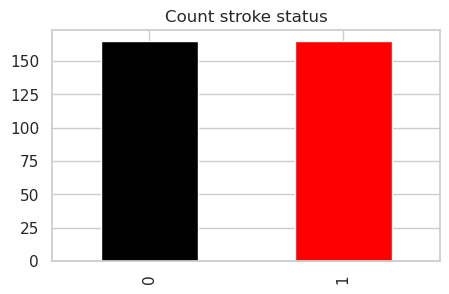

In [31]:
data_class_0_under = data_class_0.sample(count_class_1)
data_test_under = pd.concat([data_class_0_under, data_class_1], axis=0)

print('Random under-sampling:')
print(data_test_under['stroke'].value_counts())

plt.figure(figsize=(5, 3))
y = data_test_under['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['black', 'red'])
print(f"Shape of the new dataset is {data_test_under.shape}\n")

Random over-sampling

Randomly duplicating samples from minority class

Random over-sampling:
0    4226
1    4226
Name: stroke, dtype: int64
Shape of the new dataset is (8452, 11)



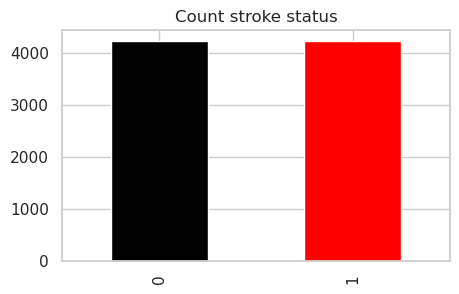

In [32]:
data_class_1_over = data_class_1.sample(count_class_0, replace=True)
data_test_over = pd.concat([data_class_0, data_class_1_over], axis=0)

print('Random over-sampling:')
print(data_test_over['stroke'].value_counts())

plt.figure(figsize=(5, 3))
y = data_test_over['stroke'].value_counts().plot(kind='bar', title='Count stroke status', color=['black', 'red'])
print(f"Shape of the new dataset is {data_test_over.shape}\n")

## **Splitting Data**

In [33]:
# Initialize StandardScaler
scaler = StandardScaler()

# Select numerical columns to scale
numerical_cols_to_scale = ['age', 'avg_glucose_level', 'bmi']

# Apply scaling on numerical columns
data[numerical_cols_to_scale] = scaler.fit_transform(data[numerical_cols_to_scale])

# Display the first few rows of the dataframe to verify scaling
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,1.734716,0,1,1,2,0,0.637380,0.718712,2,1
6,1,1.468544,1,1,1,2,0,-0.943830,-0.058869,2,1
7,0,1.246733,0,0,0,2,1,0.128550,-0.760216,2,1
8,0,0.803113,0,0,1,2,0,-0.676397,0.047858,0,1
9,0,1.645992,0,0,1,2,1,-1.452218,-0.546762,0,1


In [34]:
# Splitting the dataset into train and test set
X = data_test_over.drop(columns='stroke')
y = data_test_over['stroke']

# Using stratify kFold
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 20, stratify = y)
# Display the shape of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6761, 10), (1691, 10), (6761,), (1691,))

# **Training and Data Test**

## **Applying SMOTE to Overcome the Class-Imbalance in Target Variable**

In [35]:
smt=SMOTE()
X_train_resample,y_train_resample=smt.fit_resample(X_train,y_train)
print(X_train_resample.shape ,y_train_resample.shape)

(6762, 10) (6762,)


In [36]:
y_train_resample.value_counts().to_frame()

,stroke
0,3381
1,3381


In [37]:
# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Calculate evaluation metrics
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)


accuracy_logistic, precision_logistic, recall_logistic, f1_logistic

#Run the confusion matrix function on actual and predicted values
confusion_matrix(y_test, y_pred_logistic)
print(confusion_matrix(y_test, y_pred_logistic))

[[623 222]
 [173 673]]


In [38]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)

# Calculate evaluation metrics
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

accuracy_svc, precision_svc, recall_svc, f1_svc
#Run the confusion matrix function on actual and predicted values
confusion_matrix(y_test, y_pred_svc)
print(confusion_matrix(y_test, y_pred_svc))

[[637 208]
 [100 746]]


In [39]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

accuracy_knn, precision_knn, recall_knn, f1_knn
#Run the confusion matrix function on actual and predicted values
confusion_matrix(y_test, y_pred_knn)
print(confusion_matrix(y_test, y_pred_knn))

[[818  27]
 [  0 846]]


In [40]:
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train,y_train)
y_pred_tree = tree_model.predict(X_test)

# Calculate evaluation metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

accuracy_tree, precision_tree, recall_tree, f1_tree

#Run the confusion matrix function on actual and predicted values
confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix(y_test, y_pred_tree))

[[817  28]
 [  0 846]]


In [41]:
# Create a DataFrame to store the metrics for each model
metrics_data = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVC','KNN','Tree'],
    'Accuracy': [accuracy_logistic, accuracy_svc, accuracy_knn, accuracy_tree],
    'Precision': [precision_logistic, precision_svc, precision_knn,precision_tree],
    'Recall': [recall_logistic, recall_svc, recall_knn, recall_tree],
    'F1-Score': [f1_logistic, f1_svc, f1_knn, f1_tree]
})

# Display the metrics for comparison
metrics_data.sort_values(by='F1-Score', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
2,KNN,0.984033,0.969072,1.000000,0.984293
3,Tree,0.983442,0.967963,1.000000,0.983721
1,SVC,0.817859,0.781971,0.881797,0.828889
0,Logistic Regression,0.766410,0.751955,0.795508,0.773119


In [42]:
LR = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=2)
tree = DecisionTreeClassifier()

In [43]:
base_models = [('SVM',SVC()),('Decision Tree',DecisionTreeClassifier()),('Logistic Regerssion',LogisticRegression()) , ('KNN',KNeighborsClassifier(n_neighbors=2))]
stacking = StackingClassifier(
    estimators = base_models ,
    final_estimator = LogisticRegression(),
    cv = 5
)

stacking.fit(X_train , y_train)

StackingClassifier(cv=5,
                   estimators=[('SVM', SVC()),
                               ('Decision Tree', DecisionTreeClassifier()),
                               ('Logistic Regerssion', LogisticRegression()),
                               ('KNN', KNeighborsClassifier(n_neighbors=2))],
                   final_estimator=LogisticRegression())

In [44]:
y_pred = stacking.predict(X_test)
accuracy_score(y_test,y_pred)

0.9934949733885275